In [459]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from math import pi,sin,cos,acos,asin
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import math
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import minimize
from matplotlib.ticker import PercentFormatter
from scipy.optimize import fsolve
import matplotlib.ticker as ticker

In [460]:
def cosd(b):
    return cos(math.radians(b))
def sind(a):
    return sin(math.radians(a))
def tand(f):
    return tan(math.radians(f))
def acosd(d):
    return math.degrees(acos(d))
def asind(c):
    return math.degrees(asin(c))

In [461]:


df = pd.read_csv(r"I:\VNL data\Data\Alldata.csv")
df = df.interpolate(method='quadratic')
df['UT_Time']= df.datetime.apply(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))
df['LocalTime'] = df['UT_Time'] + timedelta(hours = 7)

df['Wind'] = df.pop('Wind1')/3.6


In [462]:
print(df.UT_Time)

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
4       2020-01-01 04:00:00
                ...        
27043   2023-01-31 19:00:00
27044   2023-01-31 20:00:00
27045   2023-01-31 21:00:00
27046   2023-01-31 22:00:00
27047   2023-01-31 23:00:00
Name: UT_Time, Length: 27048, dtype: datetime64[ns]


In [463]:
def day(LocalTime):
    return float(datetime.strftime(LocalTime,'%d'))
df['Day'] = df.LocalTime.apply(lambda x:(day(x)))

In [464]:
def month(LocalTime):
    #local_Time = UT_Time + timedelta(hours = 7)
    return float(datetime.strftime(LocalTime,'%m'))
df['Month'] = df.LocalTime.apply(lambda x:(month(x)))

def year(LocalTime):
    return float(datetime.strftime(LocalTime, '%Y'))
df['Year'] = df.LocalTime.apply(lambda x:year(x))

In [465]:
def month_day(LocalTime):
    #local_Time = UT_Time + timedelta(hours = 7)
    return datetime.strftime(LocalTime,'%m/%d %H:%M')
df['MonthDay'] = df.LocalTime.apply(lambda x:(month_day(x)))

In [466]:
print(df.head(50))

          datetime  temp  WinDir    GHI             UT_Time  \
0    1/1/2020 0:00  26.0    60.0    0.0 2020-01-01 00:00:00   
1    1/1/2020 1:00  26.0    50.0    0.0 2020-01-01 01:00:00   
2    1/1/2020 2:00  26.0    60.0    0.0 2020-01-01 02:00:00   
3    1/1/2020 3:00  26.0    50.0    0.0 2020-01-01 03:00:00   
4    1/1/2020 4:00  25.8    57.0    0.0 2020-01-01 04:00:00   
5    1/1/2020 5:00  26.0    60.0    0.0 2020-01-01 05:00:00   
6    1/1/2020 6:00  26.0    50.0   65.3 2020-01-01 06:00:00   
7    1/1/2020 7:00  25.9    50.0  277.8 2020-01-01 07:00:00   
8    1/1/2020 8:00  28.0    50.0  503.4 2020-01-01 08:00:00   
9    1/1/2020 9:00  28.0    50.0  684.3 2020-01-01 09:00:00   
10  1/1/2020 10:00  28.2    57.0  801.8 2020-01-01 10:00:00   
11  1/1/2020 11:00  29.0    60.0  855.8 2020-01-01 11:00:00   
12  1/1/2020 12:00  30.0    60.0  839.0 2020-01-01 12:00:00   
13  1/1/2020 13:00  27.9    63.0  749.5 2020-01-01 13:00:00   
14  1/1/2020 14:00  29.0    60.0  596.3 2020-01-01 14:0

In [467]:
#fig=plt.figure(figsize=(18,6))
#plt.plot(time, temp_plot)
#plt.ylabel('oC')
#plt.xlabel('Day of Jan')
#plt.title('Air Temperature in January')
#plt.grid(True)
#plt.show()

# AMPACITY PLOT


In [468]:
def wind(x):
    if abs(205.46-x) <= 90:
        return abs(205.46-x)
    elif abs(205.46-x) > 90:
        return (abs(180-abs(205.46-x)))
    else:
        return 0
   
    

In [469]:
df['WindDirection']= df.WinDir.apply(lambda x: abs(205.46-x) 
                           if abs(205.46-x) <= 90 
                           else (abs(180-abs(205.46-x)) if abs(205.46-x) > 90 else 0))
Wd=np.array(df.WindDirection[(df.Month.isin([month]))&(df['Day']<32)])


In [470]:
Ts = 100 # maximum allowable Temp
def Re(Ta,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0224 # Conductor diameter
    He = 20 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*10**(-6)*(Tf+273)**1.5)/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    return Do*p*Wv/u

In [471]:
def Qc(Ta,Wd,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0224 # Conductor diameter
    He = 20 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*(10**(-6))*((Tf+273)**1.5))/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    
    #Wd = 90 # angle of wind direction and conductor axis
    kf = 2.424*10**(-2)+7.477*10**(-5)*Tf - 4.407*10**(-9)*Tf**2 # thermal conductivity of air
    K = 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd) #wind direction factor
    q1= K*(1.01+1.35*(Re(Ta,Wv)**0.52))*kf*(Ts-Ta) #1.35 w/m correct at low wind speeds
    q2= K*0.754*(Re(Ta,Wv)**0.6)*kf*(Ts-Ta)  #0.754 w/m correct at high wind speeds
    # Choose the larger of (q1,q2)
    q3 = 3.645*(p**0.5)*(Do**0.75)*((Ts-Ta)**1.25) # 3.645 at low Wv use the larger of forced and natural
    
    if Wv <= 0.2:
        return max(q1,q2,q3)
    else:
        return max(q1,q2)

In [472]:
def Qr(Ta):
    Do = 0.0224
    Ts=100
    e = 0.7# emissivity
    return 17.8*Do*e*(1/10**8)*((Ts+273)**4-(Ta+273)**4)

In [473]:
a = 0.9 # absorbsibility
Do = 0.0224 # Conductor diameter
def Qs(qs):
    return a*Do*qs

In [474]:
def R(Ta): 
    R_low = 0.0983/1609.344
    R_high = 0.117/1609.344
    T_low = 25
    T_high = 75
    Ts =100
    Tf =0.5*(Ts+Ta)
    return R_low + (R_high-R_low)*(Tf-T_low)/(T_high-T_low)+R_low

In [475]:
def Re_CI(Ta,Wv):
    Tf=0.5*(Ta+Ts)
    #Ts = 100 # maximum allowable Temp
    L=2.368*10**(-2)+7.23*10**(-5)*Tf-2.763*10**(-8)*Tf**2 #lamda #thermal conductivity of air
    m = (17.239+4.635*10**(-2)*Tf-2.03*10**(-5)*Tf**2)*10**(-6)#muy #dynamic viscosity of air
    He = 20 # elevation
    u = (1.458*10**(-6)*(Tf+273)**1.5)/(Tf+383.4) # dynamic viscosity of air
    g = (1.293-1.525*10**(-4)*He+6.379*10**(-9)*He**2)/(1+0.00367*Tf)#gamma#density of air
    return Do*g*Wv/m

In [476]:
def Re_CI(Ta,Wv):
    Tf=0.5*(Ta+Ts)
    #Ts = 100 # maximum allowable Temp
    L=2.368*10**(-2)+7.23*10**(-5)*Tf-2.763*10**(-8)*Tf**2 #lamda #thermal conductivity of air
    m = (17.239+4.635*10**(-2)*Tf-2.03*10**(-5)*Tf**2)*10**(-6)#muy #dynamic viscosity of air
    He = 10 # elevation
    u = (1.458*10**(-6)*(Tf+273)**1.5)/(Tf+383.4) # dynamic viscosity of air
    g = (1.293-1.525*10**(-4)*He+6.379*10**(-9)*He**2)/(1+0.00367*Tf)#gamma#density of air
    return Do*g*Wv/m

In [477]:
def Cf(Ta):
    Tf = 0.5*(Ts+Ta)
    M_s = 329*0.45359237/(1000*0.3048)
    M_a = 899*0.45359237/(1000*0.3048)
    M = 1228*0.45359237/(1000*0.3048)
    C_steel = 481*(1+10**(-4)*(Tf-20))
    C_alum = 897*(1+3.8*10**(-4)*(Tf-20))
    return (C_steel*M_s + C_alum*M_a)/M

In [478]:
def Nu_90(Ta,Wv):
    if (Re_CI(Ta,Wv)>=100) and (Re_CI(Ta,Wv)<2650):
        return 0.641*Re_CI(Ta,Wv)**0.471
    elif (Re_CI(Ta,Wv)>=2650) and (Re_CI(Ta,Wv)<50000):
        return 0.048*Re_CI(Ta,Wv)**0.8
    else:
        return 0

In [479]:
def Nu(Ta,Wv,Wd):
    if (Wd <=24 and Wd >0):
        return Nu_90(Ta,Wv)*(0.42+0.68*(sind(Wd))**1.08)
    if (Wd >24 and Wd <90):
        return Nu_90(Ta,Wv)*(0.42+0.58*(sind(Wd))**0.9)
    else:
        return 0


In [480]:
def Nu_nat(Ta,Wv,Wd):
    Do = 0.0224
    Tf = 0.5*(Ta+Ts)
    L = 2.368*10**(-2)+7.23*10**(-5)*Tf-2.763*10**(-8)*Tf**2 #thermal conductivity of air
    m = (17.239+4.635*10**(-2)*Tf-2.03*10**(-5)*Tf**2)*10**(-6)#dynamic viscosity of air
    He =10 # elevation
    g = (1.293-1.525*10**(-4)*He+6.379*10**(-9)*He**2)/(1+0.00367*Tf)#density of air     
    Gr = Do**3*(Ts-Ta)*10/((Tf+273)*(m/g))
    Pr = Cf(Tf)*m/L
    if ((Gr*Pr)>10**(-1))and((Gr*Pr)<10**2):
        return 1.02*(Gr*Pr)**0.148
    elif ((Gr*Pr)>10**(2))and((Gr*Pr)<10**4):
        return 0.850*(Gr*Pr)**0.188
    elif ((Gr*Pr)>10**(4))and((Gr*Pr)<10**7):
        return 0.480*(Gr*Pr)**0.250
    elif ((Gr*Pr)>10**(7))and((Gr*Pr)<10**12):
        return 0.125*(Gr*Pr)**0.333
    else:
        return 0

In [481]:
def Qc_CI(Ta,Wv,Wd):
    Ts = 100 # maximum allowable Temp
    Do = 0.0224
    Tf = 0.5*(Ta+Ts)
    L = 2.368*10**(-2)+7.23*10**(-5)*Tf-2.763*10**(-8)*Tf**2 #thermal conductivity of air
    m = (17.239+4.635*10**(-2)*Tf-2.03*10**(-5)*Tf**2)*10**(-6)#dynamic viscosity of air
    He =10 # elevation
    g = (1.293-1.525*10**(-4)*He+6.379*10**(-9)*He**2)/(1+0.00367*Tf)#density of air
    Pc_force = (Nu(Ta,Wv,Wd))*pi*L*(Ts-Ta)
    Pc_nat = Nu_nat(Ta,Wv,Wd)*pi*L*(Ts-Ta)
    #if Wv <=0.5:
      #  return Pc_nat
    #else:
    return max(Pc_force,Pc_nat)

In [482]:
def I_CI(Ta,qs,Wv,Wd):
    return math.sqrt((Qc_CI(Ta,Wv,Wd)+Qr(Ta)-Qs(qs))/R(Ta))

In [483]:
Ta_tol = np.array(df.temp) #ambientTemp
Wv_tol = np.array(df.Wind) #windVelocity #[(df.Month.isin([m]))&(df['Day']<32)]
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_tol = np.array(df.GHI) #solarIrradiance
df['WindDirection']= df.WinDir.apply(lambda x: abs(205.46-x) 
                           if abs(205.46-x) <= 90 
                           else (abs(180-abs(205.46-x)) if abs(205.46-x) > 90 else 0))
Wd_tol=np.array(df.WindDirection)

In [484]:
def I_3E(Ta,qs,Wv,Wd):
    return math.sqrt((Qc(Ta,Wd,Wv)+Qr(Ta)-Qs(qs))/R(Ta))
#Time = np.array(df.LocalTime[(df['Month']==m)&(df['Day']<15)])

In [485]:
amp_plot_tol =np.array([I_3E(Ta_tol[i], qs_tol[i], Wv_tol[i], Wd_tol[i]) for i in range(len(Ta_tol))])

In [486]:
dadg_tol = np.array(amp_plot_tol[(amp_plot_tol<=940)])
adg_tol = np.array(amp_plot_tol[(amp_plot_tol>940)])
sum_dadg = np.sum(dadg_tol) 
sum_overall = np.sum(amp_plot_tol[np.logical_not(np.isnan(amp_plot_tol))])
#print(len(adg),len(amp_plot),len(adg)/len(amp_plot),sum_dadg/sum_overall)
print(sum_overall*1/60*np.sqrt(3)*220/(10**3))

202123.7461049571


In [487]:
m = 6
n = 7
time = np.array(df.LocalTime[(df.Month.isin([m]))&(df['Day']<32)&(df['Year'] == 2020)])
Ta = np.array(df.temp[(df.Month.isin([m]))&(df['Day']<32)&(df['Year'] == 2020)]) #ambientTemp
Wv = np.array(df.Wind[(df.Month.isin([m]))&(df['Day']<32)&(df['Year'] == 2020)]) #windVelocity #[(df.Month.isin([m]))&(df['Day']<32)]
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs = np.array(df.GHI[(df.Month.isin([m]))&(df['Day']<32)&(df['Year'] == 2020)]) #solarIrradiance
df['WindDirection']= df.WinDir.apply(lambda x: abs(205.46-x) 
                           if abs(205.46-x) <= 90 
                           else (abs(180-abs(205.46-x)) if abs(205.46-x) > 90 else 0))
Wd=np.array(df.WindDirection[(df.Month.isin([m]))&(df['Day']<32)&(df['Year'] == 2020)])


In [488]:
print(np.size(qs)/24)

30.0


In [489]:
I_CI(25,1000,5,90)

374.23093248906486

In [490]:
amp_plot =np.array([I_3E(Ta[i], qs[i], Wv[i], Wd[i]) for i in range(len(Ta))])

In [491]:
amp_plot_CI =np.array([I_CI(Ta[i], qs[i], Wv[i], Wd[i]) for i in range(len(Ta))])

In [492]:
Nu_plot = np.array([Nu(Ta[i], Wv[i], Wd[i]) for i in range(len(Wd))])

In [493]:
len(Ta)

720

In [494]:
for (i, val) in enumerate(amp_plot):
    if (i==130020):
        print(i, val)
#420

In [495]:
print(np.size(time)/24)

30.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


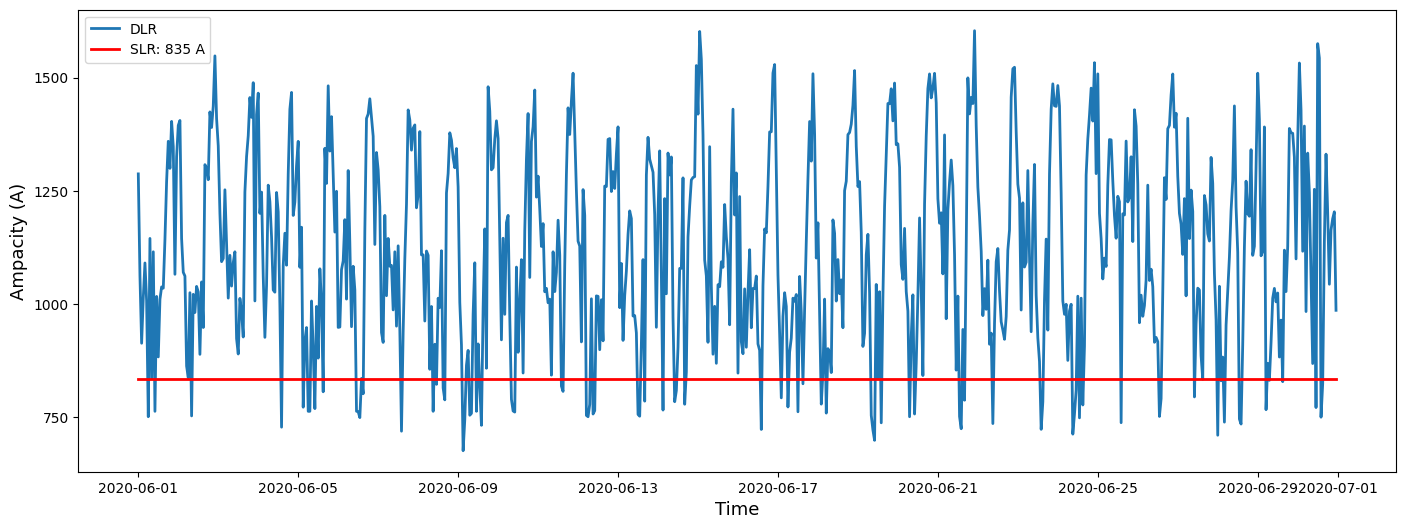

In [496]:
fig = plt.figure(figsize=(17,6))
plt.plot(time,amp_plot,linewidth=2,label ='DLR')
#plt.plot(Wv,[I_CI(25,1000,Wvi,90) for Wvi in Wv],color='blue',linewidth=3)
#plt.plot(Wv,[I_LI(25,1000,Wvi,90) for Wvi in Wv],color='green',linewidth=3)
#ax.set_xticks(range(0,11,1))
#ax.set_xticklabels(range(0,11,1))
yx = plt.subplot()
yx.set_yticks(range(250,2750,250))
yx.set_yticklabels(range(250,2750,250))
plt.ylabel('Ampacity (A)',fontsize=13)
plt.xlabel('Time',fontsize=13)
# plt.title('Ampacity in June 2020_ Tmax = 100(degC)',fontsize=14)
x = np.linspace(0,11,100)
y = [835 for i in time]
plt.plot(time,y,color='red',linewidth=2,label ='SLR: 835 A')
plt.legend()
plt.savefig(r"I:\VNL data\image\DLR\June_2020_100.eps", format='eps', dpi = 1500)
plt.show()


In [497]:
Ta_june = np.array(df.temp[(df['Month']==6)]) #ambientTemp
Wv_june = np.array(df.Wind[(df['Month']==6)]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_june = np.array(df.GHI[(df['Month']==6)]) #solarIrradiance

Te_june = np.array(df.temp[(df['Month']==6)]) #ambientTemp
Ve_june = np.array(df.Wind[(df['Month']==6)])
De_june =np.array(df.WinDir[(df['Month']==6)])
Wve_june = np.array([eff_wind(Ta_june[i], De_june[i], Ve_june[i]) for i in range(len(Ta_june))])

Wd_june=np.array(df.WinDir[(df['Month']==6)])
time_june = np.array(df.LocalTime[(df['Month']==6)])
amp_plot_june =np.array([I_3E(Ta_june[i], qs_june[i], Wv_june[i], Wd_june[i]) for i in range(len(Ta_june))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\689057049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot_june,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


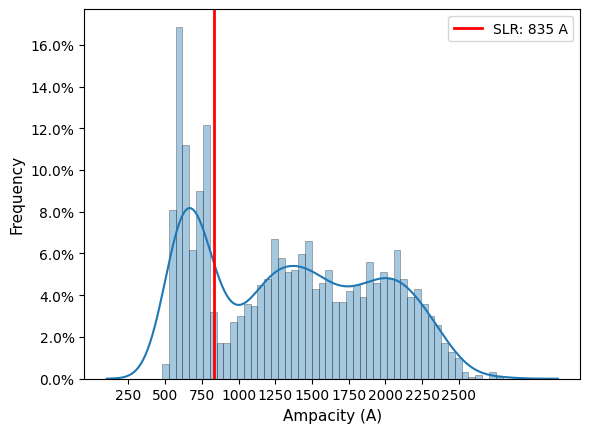

In [498]:
sns.distplot(amp_plot_june,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
plt.axvline(x=835, color='red',linewidth=2,label='SLR: 835 A')
#locs, labels = xticks()
#plt.xticks(np.arange(300,2500,step=250))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Ampacity (A)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.legend()
# plt.title('Distribution Plot of Ampacity in June 2020 _ Tmax = 100(degC) ',fontsize=11)
ax = plt.subplot()
ax.set_xticks(range(250,2750,250))
ax.set_xticklabels(range(250,2750,250))
#yx = plt.subplot()
#yx.set_yticks(range(0,18,2))
#yx.set_yticklabels(range(0,18,2))
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.savefig(r"I:\VNL data\image\DLR\100_distributionPlot_june_all.eps", format='eps', dpi = 1500)
plt.show()

In [499]:
#june
dadg = np.array(amp_plot_june[(amp_plot_june<=835)])
adg = np.array(amp_plot_june[(amp_plot_june>835)])
sum_dadg = np.sum(dadg) 
sum_overall = np.sum(amp_plot_june[np.logical_not(np.isnan(amp_plot_june))])
print(len(adg),len(amp_plot_june),len(adg)/len(amp_plot_june),sum_dadg/sum_overall)

1492 2160 0.6907407407407408 0.1520269725125251


In [500]:
#June
dadg = np.array(amp_plot[(amp_plot<=835)])
adg = np.array(amp_plot[(amp_plot>835)])
sum_dadg = np.sum(dadg) 
sum_overall = np.sum(amp_plot[np.logical_not(np.isnan(amp_plot))])
print(len(adg),len(amp_plot),len(adg)/len(amp_plot),sum_dadg/sum_overall)

638 720 0.8861111111111111 0.0780439151574464


In [501]:
def K_a(Wd):
    return 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd)

In [502]:
def eff_wind(Ta,Wd,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0224 # Conductor diameter
    He = 20 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*(10**(-6))*((Tf+273)**1.5))/(Tf+383.4) # dynamic viscosity of air
    #Do*p*Wv/u
    # Wv = # wind velocity
    #Wd = 90 # angle of wind direction and conductor axis
    kf = 2.424*10**(-2)+7.477*10**(-5)*Tf - 4.407*10**(-9)*Tf**2 # thermal conductivity of air
    K = 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd) #wind direction factor
    q1= K*(1.01+1.35*(Re(Ta,Wv)**0.52))*kf*(Ts-Ta) #1.35 w/m correct at low wind speeds
    q2= K*0.754*(Re(Ta,Wv)**0.6)*kf*(Ts-Ta)  #0.754 w/m correct at high wind speeds
    # Choose the larger of (q1,q2)
    q3 = 3.645*(p**0.5)*(Do**0.75)*((Ts-Ta)**1.25) # 3.645 at low Wv use the larger of forced and natural   
    
    if q1>q2:
        return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)
    else:
        return ((K_a(Wd)*(Re(Ta,Wv)**0.6)/K_a(90))**(1/0.6))*u/(Do*p)

In [503]:
Ta_np = np.array(df.temp[(df['Month']==1)]) #ambientTemp
Wv_np = np.array(df.Wind[(df['Month']==1)]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_np = np.array(df.GHI[(df['Month']==1)]) #solarIrradiance

Te_n = np.array(df.temp[(df['Month']==1)]) #ambientTemp
Ve_n = np.array(df.Wind[(df['Month']==1)])
De_n =np.array(df.WinDir[(df['Month']==1)])
Wve_np = np.array([eff_wind(Te_n[i], De_n[i], Ve_n[i]) for i in range(len(Te_n))])

Wd_np=np.array(df.WinDir[(df['Month']==1)])
time_np = np.array(df.LocalTime[(df['Month']==1)])
amp_plot_np =np.array([I_3E(Ta_np[i], qs_np[i], Wv_np[i], Wd_np[i]) for i in range(len(Ta_np))])
#&(df['Year'] == 2020)])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


In [504]:
dadg = np.array(amp_plot_np[(amp_plot_np<=835)])
adg = np.array(amp_plot_np[(amp_plot_np>835)])
sum_dadg = np.sum(dadg) 
sum_overall = np.sum(amp_plot_np[np.logical_not(np.isnan(amp_plot_np))])
print(len(adg),len(amp_plot_np),len(adg)/len(amp_plot_np),sum_dadg/sum_overall)

2561 2969 0.8625799932637251 0.07140064511535198


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\1771227187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot_np,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


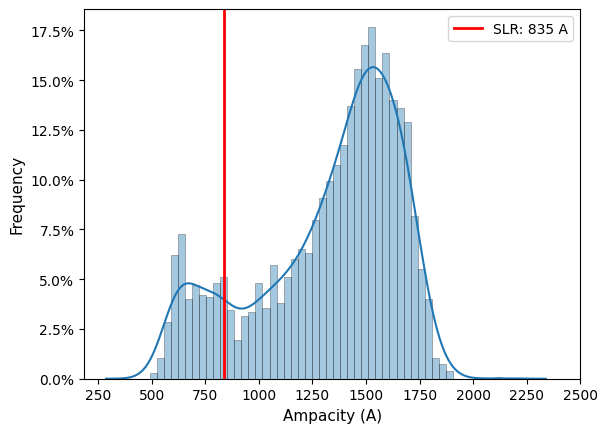

In [505]:
sns.distplot(amp_plot_np,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
plt.axvline(x=835, color='red',linewidth=2,label='SLR: 835 A')
#locs, labels = xticks()
#plt.xticks(np.arange(300,2500,step=250))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Ampacity (A)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.legend()
# plt.title('Distribution Plot of Ampacity in January _ Tmax = 100(degC) ',fontsize=11)
ax = plt.subplot()
ax.set_xticks(range(250,2750,250))
ax.set_xticklabels(range(250,2750,250))
#yx = plt.subplot()
#yx.set_yticks(range(0,18,2))
#yx.set_yticklabels(range(0,18,2))
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.savefig(r"I:\VNL data\image\DLR\100_distributionPlot_jan.eps", format='eps', dpi = 1500)
plt.show()

In [506]:
Ta_all = np.array(df.temp) #ambientTemp
Wv_all = np.array(df.Wind) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_all = np.array(df.GHI) #solarIrradiance

Te_all = np.array(df.temp) #ambientTemp
Ve_all = np.array(df.Wind)
De_all =np.array(df.WinDir)
Wve_all = np.array([eff_wind(Te_n[i], De_n[i], Ve_n[i]) for i in range(len(Te_n))])

Wd_all=np.array(df.WinDir)
time_all = np.array(df.LocalTime)
amp_plot_all =np.array([I_3E(Ta_all[i], qs_all[i], Wv_all[i], Wd_all[i]) for i in range(len(Ta_all))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\1340261597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot_all,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


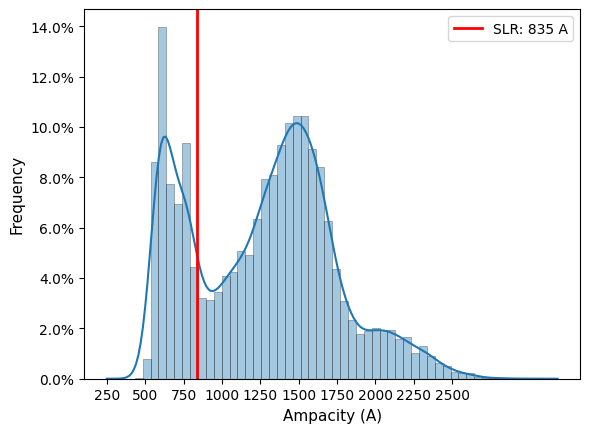

In [507]:
sns.distplot(amp_plot_all,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
plt.axvline(x=835, color='red',linewidth=2,label='SLR: 835 A')
#locs, labels = xticks()
#plt.xticks(np.arange(300,2500,step=250))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Ampacity (A)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.legend()
# plt.title('Distribution Plot of Ampacity from Jan 2020 to Feb 2023 ',fontsize=11)
ax = plt.subplot()
ax.set_xticks(range(250,2750,250))
ax.set_xticklabels(range(250,2750,250))
#yx = plt.subplot()
#yx.set_yticks(range(0,18,2))
#yx.set_yticklabels(range(0,18,2))
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.savefig(r"I:\VNL data\image\DLR\100_Distribution_all.eps", format='eps', dpi = 1500)
plt.show()

In [508]:
#all
dadg = np.array(amp_plot_all[(amp_plot_all<=835)])
adg = np.array(amp_plot_all[(amp_plot_all>835)])
sum_dadg = np.sum(dadg) 
sum_overall = np.sum(amp_plot_all[np.logical_not(np.isnan(amp_plot_all))])
print(len(adg),len(amp_plot_all),len(adg)/len(amp_plot_all),sum_dadg/sum_overall)

19918 27048 0.7363945578231292 0.13846496957087195


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\3630011272.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot,bins=50,ax=ax_hist,hist_kws=dict(edgecolor="black",linewidth=0.5),color='darkcyan')


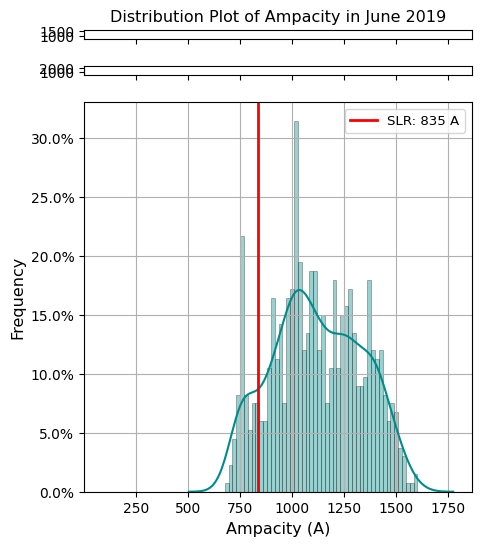

In [509]:
f, (ax_box, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.02,.02, .85)},figsize=(5,6))
sns.boxplot(amp_plot, color='darkcyan',ax=ax_box,showfliers=False)
#ax_box.scatter(1366.22,0,color='red')
sns.boxplot(dadg, color='darkcyan',ax=ax_box2,showfliers=False)
sns.boxplot(adg, color='darkcyan',ax=ax_box2,showfliers=False)
plt.grid()
#ax1 = plt.subplot()
ax_hist.set_xticks(range(250,2750,250))
ax_hist.set_xticklabels(range(250,2750,250))
sns.distplot(amp_plot,bins=50,ax=ax_hist,hist_kws=dict(edgecolor="black",linewidth=0.5),color='darkcyan')
plt.axvline(x=835, color='red',linewidth=2,label='SLR: 835 A')

plt.legend(loc='upper right',fontsize=9.65)
plt.xlabel('Ampacity (A)',fontsize=11.5)
plt.ylabel('Frequency',fontsize=11.5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
ax_box.set_title('Distribution Plot of Ampacity in June 2019',fontsize=11.5)
plt.show()

In [510]:
dadg_np = np.array(amp_plot_np[(amp_plot_np<=835)])
adg_np = np.array(amp_plot_np[(amp_plot_np>835)])
sum_dadg_np = np.sum(dadg_np) 
sum_overall_np = np.sum(amp_plot_np[np.logical_not(np.isnan(amp_plot_np))])
print(len(dadg_np),len(amp_plot_np),len(dadg_np)/len(amp_plot_np),sum_dadg_np/sum_overall_np)
#x[numpy.logical_not(numpy.isnan(x))]

408 2969 0.13742000673627483 0.07140064511535198


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\1373212248.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot_np,bins=50,ax=ax_hist,hist_kws=dict(edgecolor="black",linewidth=0.5),color='darkcyan')


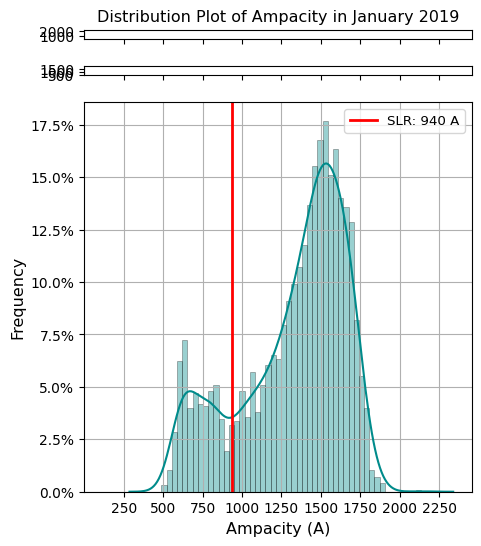

In [511]:
f, (ax_box, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.02,.02, .85)},figsize=(5,6))


sns.boxplot(amp_plot_np, color='darkcyan',ax=ax_box,showfliers=False)
#ax_box.set_xticks(range(250,2500,250))
#ax_box.set_xticklabels(range(250,2500,250))

sns.boxplot(dadg_np, color='darkcyan',ax=ax_box2,showfliers=False)
sns.boxplot(adg_np, color='darkcyan',ax=ax_box2,showfliers=False)
#ax_box2.set_xticks(range(250,2500,250))
#ax_box2.set_xticklabels(range(250,2500,250))
plt.grid()
#ax1 = plt.subplot()
ax_hist.set_xticks(range(250,2500,250))
ax_hist.set_xticklabels(range(250,2500,250))
sns.distplot(amp_plot_np,bins=50,ax=ax_hist,hist_kws=dict(edgecolor="black",linewidth=0.5),color='darkcyan')
plt.axvline(x=940, color='red',linewidth=2,label='SLR: 940 A')
#ax_hist.set_xticks(range(250,2500,250))
#ax_hist.set_xticklabels(range(250,2500,250))
plt.legend(loc='upper right',fontsize=9.65)
plt.xlabel('Ampacity (A)',fontsize=11.5)
plt.ylabel('Frequency',fontsize=11.5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
ax_box.set_title('Distribution Plot of Ampacity in January 2019',fontsize=11.5)
plt.show()

In [512]:
k=11
t=12
Ta_8 = np.array(df.temp[(df['Month']==8)]) #ambientTemp
Wv_8 = np.array(df.Wind[(df['Month']==8)]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_8 = np.array(df.GHI[(df['Month']==8)]) #solarIrradiance

Te_8 = np.array(df.temp[(df['Month']==8)]) #ambientTemp
Ve_8 = np.array(df.Wind[(df['Month']==8)])
De_8 =np.array(df.WindDirection[(df['Month']==8)])
Wve_8 = np.array([eff_wind(Te_8[i], De_8[i], Ve_8[i]) for i in range(len(Te_8))])

Wd_8=np.array(df.WindDirection[(df['Month']==8)])
time_8 = np.array(df.LocalTime[(df['Month']==8)])
amp_plot_8 =np.array([I_3E(Ta_8[i], qs_8[i], Wv_8[i], Wd_8[i]) for i in range(len(Ta_8))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


In [513]:
#August
dadg_8 = np.array(amp_plot_8[(amp_plot_8<=835)])
adg_8 = np.array(amp_plot_8[(amp_plot_8>835)])
sum_dadg_8 = np.sum(dadg_8) 
sum_overall_8 = np.sum(amp_plot_8[np.logical_not(np.isnan(amp_plot_8))])
print(len(dadg_8),len(amp_plot_8),len(dadg_8)/len(amp_plot_8),sum_dadg_8/sum_overall_8)

235 2232 0.10528673835125447 0.07216832872499408


C:\Users\Students\AppData\Local\Temp\ipykernel_19508\4234984663.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amp_plot_8,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


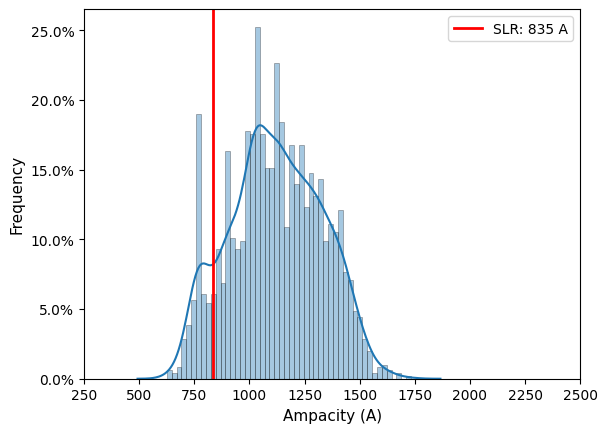

In [514]:
sns.distplot(amp_plot_8,bins=50,hist_kws=dict(edgecolor="black",linewidth=0.5))
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
plt.axvline(x=835, color='red',linewidth=2,label='SLR: 835 A')
#locs, labels = xticks()
#plt.xticks(np.arange(300,2500,step=250))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Ampacity (A)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.legend()
#plt.title('Distribution Plot of Ampacity from August',fontsize=11)
ax = plt.subplot()
ax.set_xticks(range(250,2750,250))
ax.set_xticklabels(range(250,2750,250))
#yx = plt.subplot()
#yx.set_yticks(range(0,18,2))
#yx.set_yticklabels(range(0,18,2))
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.01))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.savefig(r"I:\VNL data\image\DLR\100_distribution_august.eps", format='eps', dpi = 1500)
plt.show()

In [515]:
sum_loss_np= np.sum(835- np.array(amp_plot_np[(amp_plot_np<=835)])) 
print(sum_loss_np*1/60*np.sqrt(3)*220/(10**3))
sum_gain_np = np.sum(np.array(amp_plot_np[(amp_plot_np>835)])-835)
print(sum_gain_np*1/60*np.sqrt(3)*220/(10**3))

381.3776463443025
9597.874932640863


In [516]:
sum_loss= np.sum(835- np.array(amp_plot[(amp_plot<=835)])) 
print(sum_loss*1/60*np.sqrt(3)*220/(10**3))
sum_gain = np.sum(np.array(amp_plot[(amp_plot>835)])-835)
print(sum_gain*1/60*np.sqrt(3)*220/(10**3))

35.7229871765947
1331.6328931041762


In [517]:
sum_loss_8= np.sum(835- np.array(amp_plot_8[(amp_plot_8<=835)])) 
print(sum_loss_8*1/60*np.sqrt(3)*220/(10**3))
sum_gain_8 = np.sum(np.array(amp_plot_8[(amp_plot_8>835)])-835)
print(sum_gain_8*1/60*np.sqrt(3)*220/(10**3))

102.01422667870179
4120.151896025421


In [518]:
sum_loss_tol= np.sum(940- np.array(amp_plot_tol[(amp_plot_tol<=940)])) 
print(sum_loss_tol*1/60*np.sqrt(3)*220/(10**3))
sum_gain_tol = np.sum(np.array(amp_plot_tol[(amp_plot_tol>940)])-940)
print(sum_gain_tol*1/60*np.sqrt(3)*220/(10**3))

2462.4441902414264
43114.991657234634


In [519]:
np.median(amp_plot_8[np.logical_not(np.isnan(amp_plot_8))])

1117.1486082268757

In [520]:
np.median(dadg_8)

768.7368688411777

In [521]:
np.median(adg_8)

1142.376064290115

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


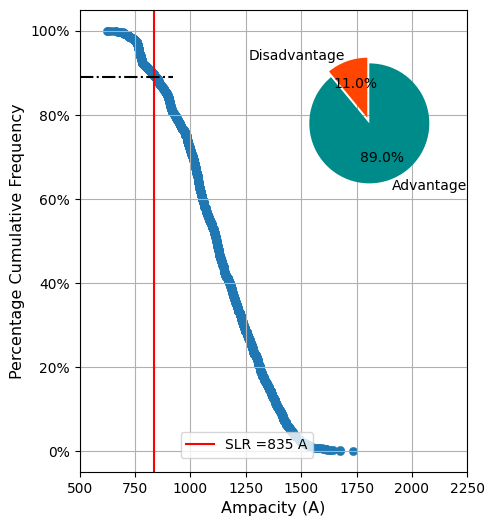

In [522]:
plt.figure(figsize=(5,6))
plt.axvline(x=835,color='red',label='SLR =835 A')
#plt.xticks(np.arange(250, 3000, step=250))
plt.legend(loc='upper right', bbox_to_anchor=(0.62, 0.1))
plt.xlabel('Ampacity (A)',fontsize=11.5)
plt.ylabel('Percentage Cumulative Frequency',fontsize=11.5)

x=np.sort(amp_plot_8)[::-1]
n=x.size
y = np.arange(1, n+1) / n
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.axhline(y=0.891, xmin=0, xmax=0.24,color='black',linestyle='dashdot')
plt.grid()
plt.scatter(x=x, y=y,linewidths=0.3)
ax1 = plt.subplot()
ax1.set_xticks(range(500,2450,250))
ax1.set_xticklabels(range(500,2450,250))
ax = plt.axes([0.55, 0.55, 0.3, 0.3])

ax.pie([11,89],colors=('orangered','darkcyan'),explode=(0, 0.1),startangle=90,autopct='%1.1f%%',labels=('Disadvantage','Advantage'))
#plt.pie()
plt.savefig(r"I:\VNL data\image\DLR\100_cumulative_August.eps", format='eps', dpi = 1500)
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


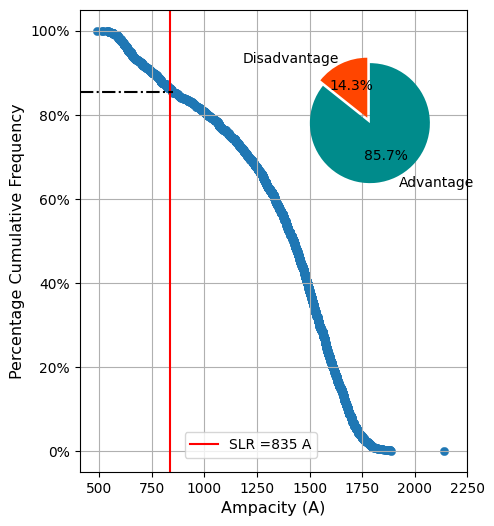

In [523]:
plt.figure(figsize=(5,6))
plt.axvline(x=835,color='red',label='SLR =835 A')
#plt.xticks(np.arange(250, 3000, step=250))
plt.legend(loc='upper right', bbox_to_anchor=(0.63, 0.1))
plt.xlabel('Ampacity (A)',fontsize=11.5)
plt.ylabel('Percentage Cumulative Frequency',fontsize=11.5)


x=np.sort(amp_plot_np)[::-1]
n=x.size
y = np.arange(1, n+1) / n
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.axhline(y=0.853, xmin=0, xmax=0.24,color='black',linestyle='dashdot')
plt.grid()
plt.scatter(x=x, y=y,linewidths=0.3)
ax1 = plt.subplot()
ax1.set_xticks(range(500,2450,250))
ax1.set_xticklabels(range(500,2450,250))
ax = plt.axes([0.55, 0.55, 0.3, 0.3])

ax.pie([14.3,85.7],colors=('orangered','darkcyan'),explode=(0, 0.1),startangle=90,autopct='%1.1f%%',labels=('Disadvantage','Advantage'))
plt.savefig(r"I:\VNL data\image\DLR\100_cumulative_Jan.eps", format='eps', dpi = 1500)
#plt.pie()
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


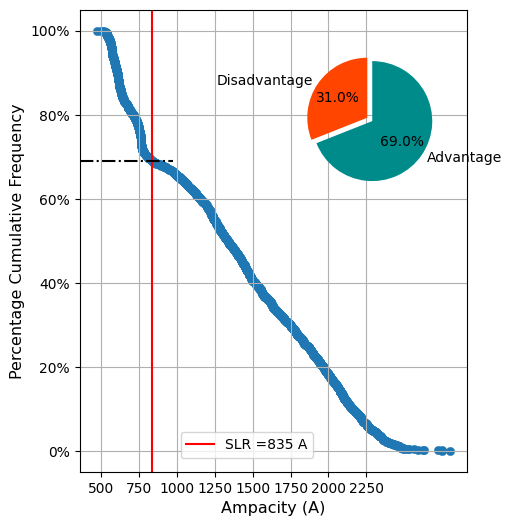

In [524]:
plt.figure(figsize=(5,6))
plt.axvline(x=835,color='red',label='SLR =835 A')
#plt.xticks(np.arange(250, 3000, step=250))
plt.legend(loc='upper right', bbox_to_anchor=(0.62, 0.1))
plt.xlabel('Ampacity (A)',fontsize=11.5)
plt.ylabel('Percentage Cumulative Frequency',fontsize=11.5)

x=np.sort(amp_plot_june)[::-1]
n=x.size
y = np.arange(1, n+1) / n
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.axhline(y=0.69, xmin=0, xmax=0.24,color='black',linestyle='dashdot')
plt.grid()
plt.scatter(x=x, y=y,linewidths=0.3)
ax1 = plt.subplot()
ax1.set_xticks(range(500,2450,250))
ax1.set_xticklabels(range(500,2450,250))
ax = plt.axes([0.55, 0.55, 0.3, 0.3])

ax.pie([31,69],colors=('orangered','darkcyan'),explode=(0, 0.1),startangle=90,autopct='%1.1f%%',labels=('Disadvantage','Advantage'))
plt.savefig(r"I:\VNL data\image\DLR\100_cumulative_June.eps", format='eps', dpi = 1500)
#plt.pie()
plt.show()



In [525]:
Ta_8 = np.array(df.temp[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)]) #ambientTemp
Wv_8 = np.array(df.Wind[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_8 = np.array(df.GHI[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)]) #solarIrradiance

Te_8 = np.array(df.temp[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)]) #ambientTemp
Ve_8 = np.array(df.Wind[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)])
De_8 =np.array(df.WindDirection[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)])
Wve_8 = np.array([eff_wind(Te_8[i], De_8[i], Ve_8[i]) for i in range(len(Te_8))])

Wd_8=np.array(df.WindDirection[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)])
time_8 = np.array(df.LocalTime[(df['Month']==9)&(df['Day'].isin([11,12,13,14,15,16,17,18]))&(df['Year'] == 2020)])
amp_plot_8 =np.array([I_3E(Ta_8[i], qs_8[i], Wv_8[i], Wd_8[i]) for i in range(len(Ta_8))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


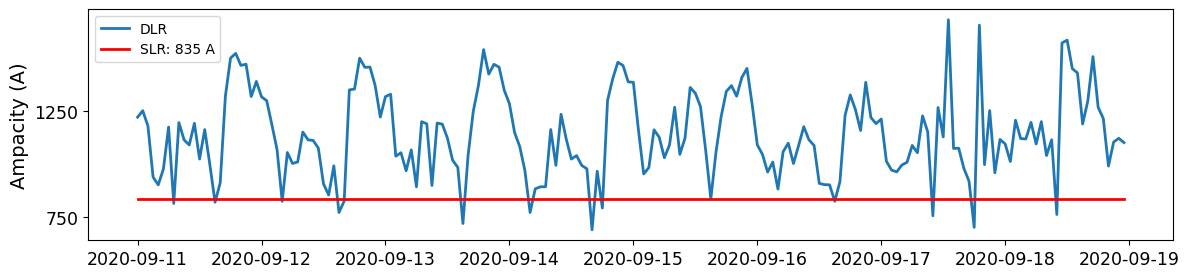

In [526]:
fig = plt.figure(figsize=(14,3))
plt.plot(time_8,amp_plot_8,linewidth=2,label ='DLR')
#plt.plot(Wv,[I_CI(25,1000,Wvi,90) for Wvi in Wv],color='blue',linewidth=3)
#plt.plot(Wv,[I_LI(25,1000,Wvi,90) for Wvi in Wv],color='green',linewidth=3)
#ax.set_xticks(range(0,11,1))
#ax.set_xticklabels(range(0,11,1))
yx = plt.subplot()
yx.set_yticks(range(250,2750,500))
yx.set_yticklabels(range(250,2750,500),fontsize=12.5)
plt.ylabel('Ampacity (A)',fontsize=14)
#plt.xlabel('Time',fontsize=11.5)
#plt.title('Ampacity in June 2019',fontsize=14)
x = np.linspace(0,11,100)
y = [835 for i in time_8]
plt.plot(time_8,y,color='red',linewidth=2,label ='SLR: 835 A')
#plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=12.5)
plt.legend()
plt.savefig(r"I:\VNL data\image\DLR\100_DLR_11_19_9.eps", format='eps', dpi = 1500)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


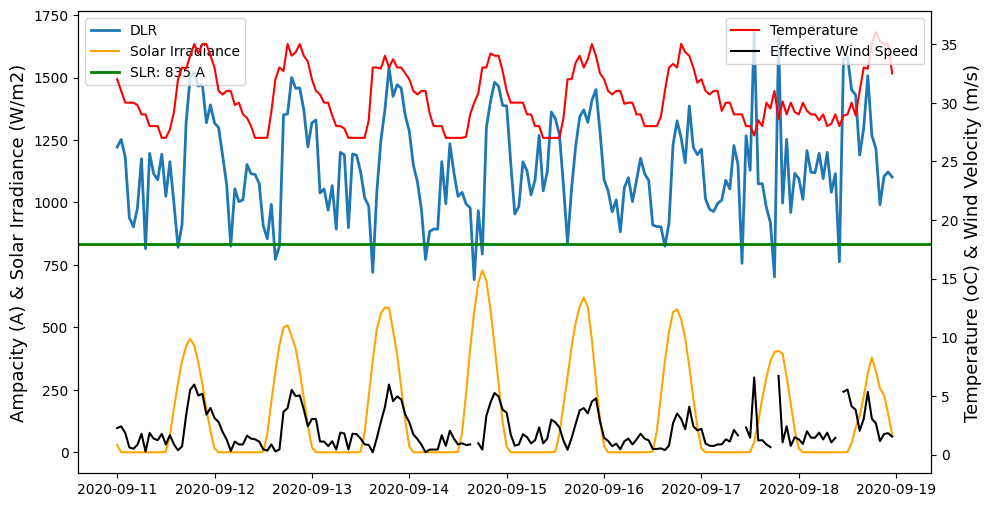

In [527]:
fig,ax = plt.subplots(figsize=(11,6))
ax.plot(time_8,amp_plot_8, linewidth=2,label='DLR')
ax.plot(time_8,qs_8, linewidth=1.5,label='Solar Irradiance',color='orange')
#ax.set_xlabel("Time",fontsize=13)
ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
#ax.set_yticks(range(250,1750,250))
#ax.set_yticklabels(range(250,1750,250),fontsize=12.5)
plt.legend(loc='upper left',fontsize=12)
#x = np.linspace(0,11,100)
plt.axhline(y=835, color='green',linewidth=2,label='SLR: 835 A')
plt.legend(loc='upper left',fontsize=10)
ax2=ax.twinx()
ax2.plot(time_8,Ta_8,linewidth=1.5,color='red',label='Temperature')
ax2.plot(time_8,Wve_8,linewidth=1.5,color='black',label='Effective Wind Speed')
ax2.set_ylabel("Temperature (oC) & Wind Velocity (m/s)",fontsize=13)
# plt.title('Ampacity & Environmental Parameters in 11th,12th August 2019',fontsize=13)
plt.xticks(fontsize=12.5)
plt.legend(loc='upper right',fontsize=10)
plt.savefig(r"I:\VNL data\image\DLR\100_all_11_19_9.eps", format='eps', dpi = 1500)
plt.show()

In [531]:
Ta_mp = np.array(df.temp[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)]) #ambientTemp
Wv_mp = np.array(df.Wind[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_mp = np.array(df.GHI[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)]) #solarIrradiance

Te = np.array(df.temp[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)]) #ambientTemp
Ve = np.array(df.Wind[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)])
De=np.array(df.WindDirection[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)])
Wve_mp = np.array([eff_wind(Te[i], De[i], Ve[i]) for i in range(len(Te))])

Wd_mp=np.array(df.WindDirection[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)])
time_mp = np.array(df.LocalTime[(df['Month']==6)&(df['Day'].isin([21,22]))&(df['Year']==2020)])
amp_plot_mp =np.array([I_3E(Ta_mp[i], qs_mp[i], Wv_mp[i], Wd_mp[i]) for i in range(len(Ta_mp))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2244183191.py:20: RuntimeWarning: invalid value encountered in scalar power
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


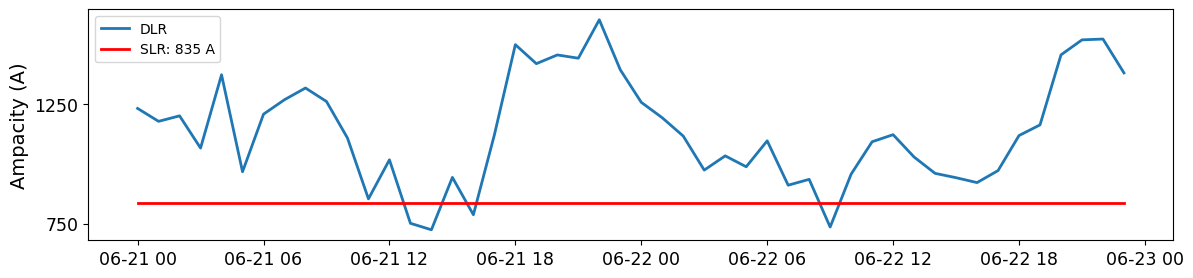

In [532]:
fig = plt.figure(figsize=(14,3))
plt.plot(time_mp,amp_plot_mp,linewidth=2,label ='DLR')
#plt.plot(Wv,[I_CI(25,1000,Wvi,90) for Wvi in Wv],color='blue',linewidth=3)
#plt.plot(Wv,[I_LI(25,1000,Wvi,90) for Wvi in Wv],color='green',linewidth=3)
#ax.set_xticks(range(0,11,1))
#ax.set_xticklabels(range(0,11,1))
yx = plt.subplot()
yx.set_yticks(range(250,2750,500))
yx.set_yticklabels(range(250,2750,500),fontsize=12.5)
plt.ylabel('Ampacity (A)',fontsize=14)
#plt.xlabel('Time',fontsize=11.5)
#plt.title('Ampacity in June 2019',fontsize=14)
x = np.linspace(0,11,100)
y = [835 for i in time_mp]
plt.plot(time_mp,y,color='red',linewidth=2,label ='SLR: 835 A')
#plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=12.5)
plt.legend()
plt.show()

In [533]:
print(len(Wve_mp),len(amp_plot_mp))

48 48


In [ ]:
42855 43199

SyntaxError: invalid syntax (1050081710.py, line 1)

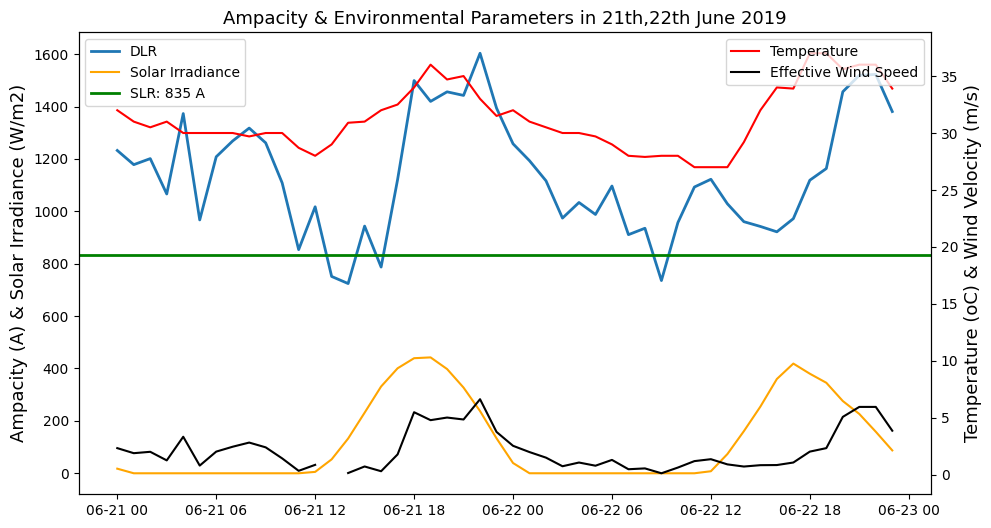

In [534]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(11,6))
# make a plot
ax.plot(time_mp,amp_plot_mp, linewidth=2,label='DLR')
ax.plot(time_mp,qs_mp, linewidth=1.5,label='Solar Irradiance',color='orange')
# set x-axis label
#ax.set_xlabel("Time",fontsize=13)
# set y-axis label
ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
plt.legend(loc='upper left',fontsize=12)
#x = np.linspace(0,11,100)
# twin object for two different y-axis on the sample plot
plt.axhline(y=835, color='green',linewidth=2,label='SLR: 835 A')
plt.legend(loc='upper left',fontsize=10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(time_mp,Ta_mp,linewidth=1.5,color='red',label='Temperature')
ax2.plot(time_mp,Wve_mp,linewidth=1.5,color='black',label='Effective Wind Speed')
#ax2.plot(time_mp,Wv_mp,linewidth=1.5,color='green',label='Wind Speed')
#ax2.plot(time_mp,Wd_mp,linewidth=1.5,color='green',label='wind relative angle')
ax2.set_ylabel("Temperature (oC) & Wind Velocity (m/s)",fontsize=13)
plt.title('Ampacity & Environmental Parameters in 21th,22th June 2019',fontsize=13)
plt.legend(loc='upper right',fontsize=10)
plt.show()


In [ ]:
Ta_np = np.array(df.Temp_ThHyg1_degC_avg[(df['Month']==1)&(df['Day'].isin([21,22]))]) #ambientTemp
Wv_np = np.array(df.WindSpeed_Anemo1_ms_avg[(df['Month']==1)&(df['Day'].isin([21,22]))]) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_np = np.array(df.GHI_ThPyra1_Wm2_avg[(df['Month']==1)&(df['Day'].isin([21,22]))]) #solarIrradiance

Te_n = np.array(df.Temp_ThHyg1_degC_avg[(df['Month']==1)&(df['Day'].isin([21,22]))]) #ambientTemp
Ve_n = np.array(df.WindSpeed_Anemo1_ms_avg[(df['Month']==1)&(df['Day'].isin([21,22]))])
De_n =np.array(df.WindDirection[(df['Month']==1)&(df['Day'].isin([21,22]))])
Wve_np = np.array([eff_wind(Te_n[i], De_n[i], Ve_n[i]) for i in range(len(Te_n))])

Wd_np=np.array(df.WindDirection[(df['Month']==1)&(df['Day'].isin([21,22]))])
time_np = np.array(df.LocalTime[(df['Month']==1)&(df['Day'].isin([21,22]))])
amp_plot_np =np.array([I_3E(Ta_np[i], qs_np[i], Wv_np[i], Wd_np[i]) for i in range(len(Ta_np))])

AttributeError: 'DataFrame' object has no attribute 'Temp_ThHyg1_degC_avg'

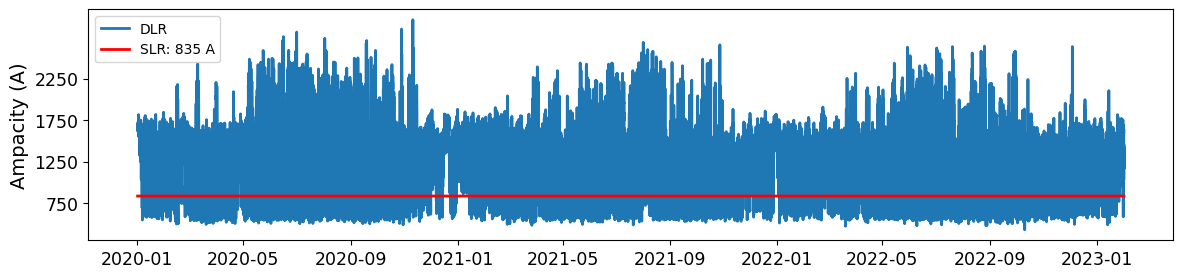

In [ ]:
fig = plt.figure(figsize=(14,3))
plt.plot(time_np,amp_plot_np,linewidth=2,label ='DLR')
#plt.plot(Wv,[I_CI(25,1000,Wvi,90) for Wvi in Wv],color='blue',linewidth=3)
#plt.plot(Wv,[I_LI(25,1000,Wvi,90) for Wvi in Wv],color='green',linewidth=3)
#ax.set_xticks(range(0,11,1))
#ax.set_xticklabels(range(0,11,1))
yx = plt.subplot()
yx.set_yticks(range(250,2750,500))
yx.set_yticklabels(range(250,2750,500),fontsize=12.5)
plt.ylabel('Ampacity (A)',fontsize=14)
#plt.xlabel('Time',fontsize=11.5)
#plt.title('Ampacity in June 2019',fontsize=14)
x = np.linspace(0,11,100)
y = [835 for i in time_np]
plt.plot(time_np,y,color='red',linewidth=2,label ='SLR: 835 A')
#plt.xlabel('Time', fontsize=14)
plt.xticks(fontsize=12.5)
plt.legend()
plt.show()

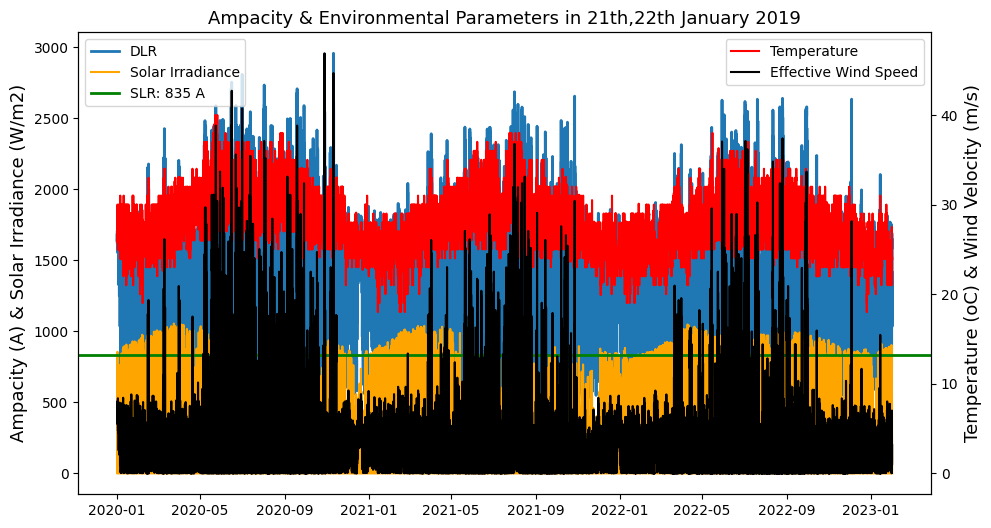

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(11,6))
# make a plot
ax.plot(time_np,amp_plot_np, linewidth=2,label='DLR')
ax.plot(time_np,qs_np, linewidth=1.5,label='Solar Irradiance',color='orange')
# set x-axis label
#ax.set_xlabel("Time",fontsize=13)
# set y-axis label
ax.set_ylabel("Ampacity (A) & Solar Irradiance (W/m2)",fontsize=13)
plt.legend(loc='upper left',fontsize=10)
plt.axhline(y=835, color='green',linewidth=2,label='SLR: 835 A')
plt.legend(loc='upper left',fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(time_np,Wd_np,linewidth=0.5,color='green',label='wind relative angle')
ax2.plot(time_np,Ta_np,linewidth=1.5,color='red',label='Temperature')
ax2.plot(time_np,Wve_np,linewidth=1.5,color='black',label='Effective Wind Speed')
#ax2.plot(time_np,Wv_np,linewidth=1.5,color='green',label='Wind Speed')
ax2.set_ylabel("Temperature (oC) & Wind Velocity (m/s)",fontsize=13)
plt.title('Ampacity & Environmental Parameters in 21th,22th January 2019',fontsize=13)
plt.legend(loc = 'upper right', fontsize=10)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

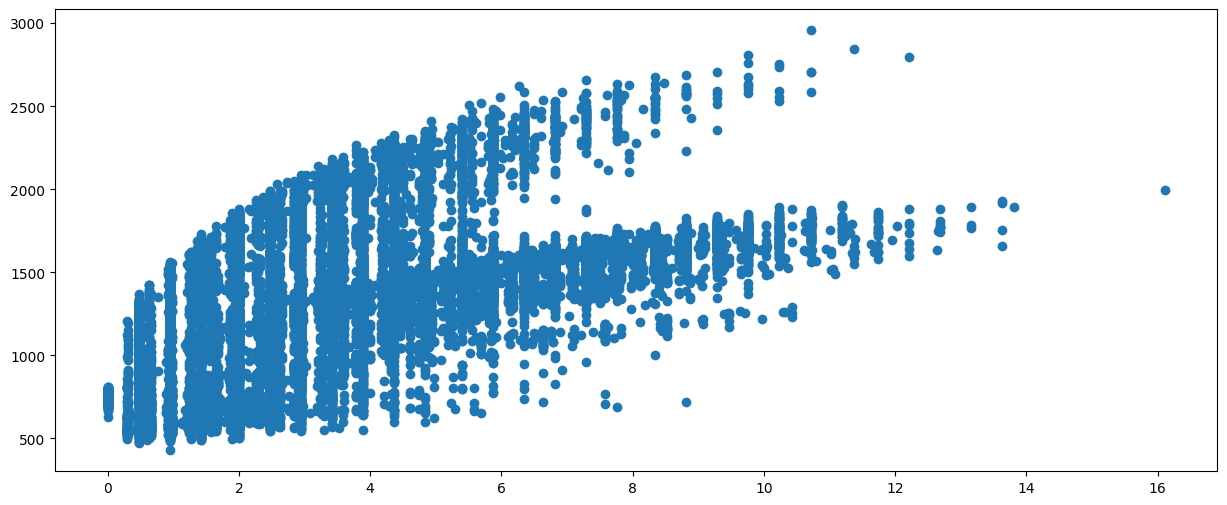

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(Wv_np,amp_plot_np);

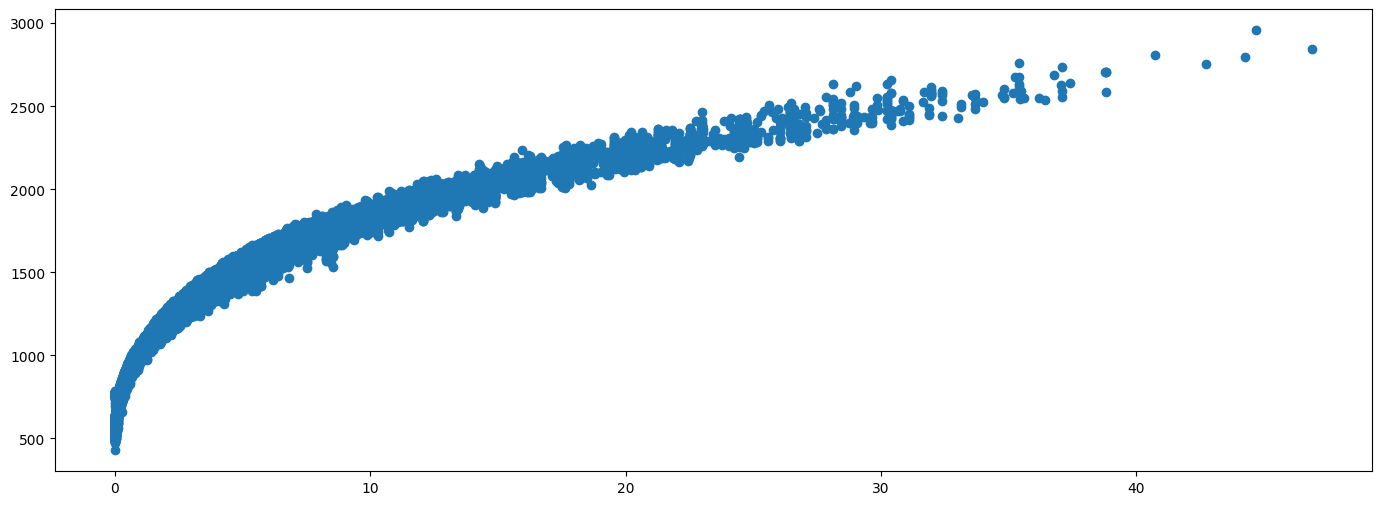

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(Wve_np,amp_plot_np)

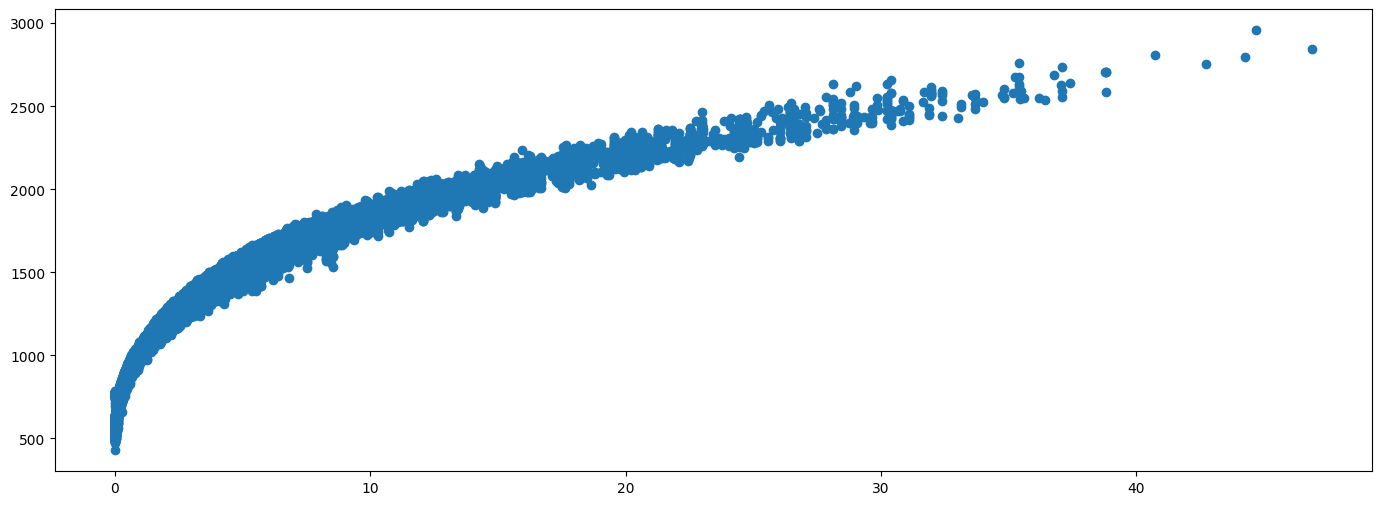

In [ ]:

plt.figure(figsize=(17,6))
plt.scatter(Wve_np,amp_plot_np)

C:\Users\Students\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Students\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


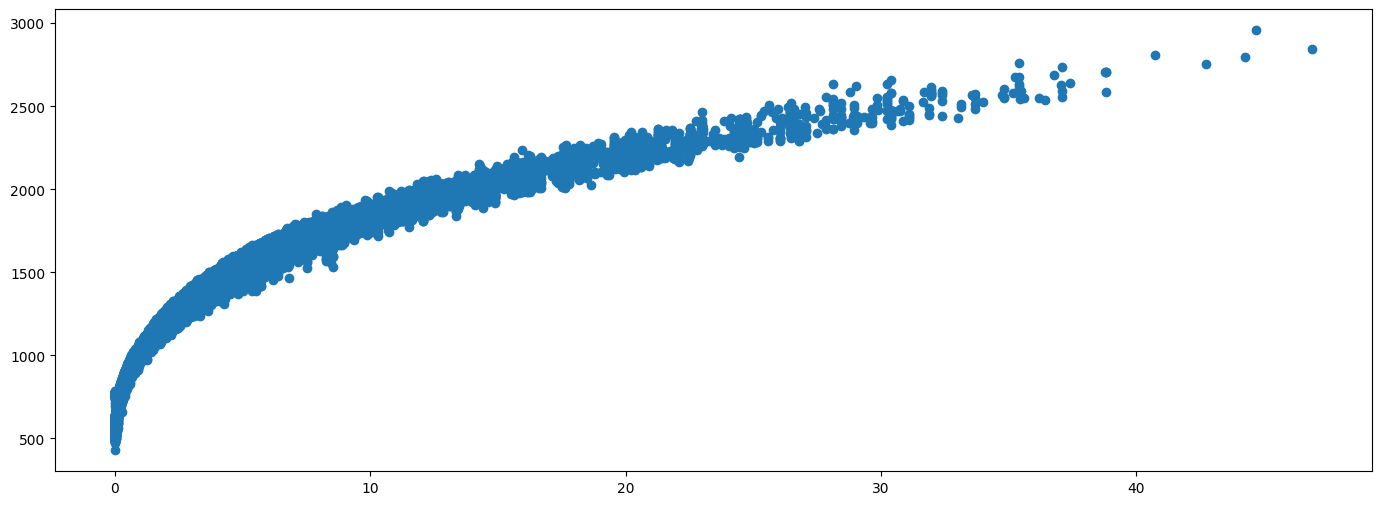

In [ ]:
plt.figure(figsize=(17,6))
Wve_mp = Wve_np[np.logical_not(np.isnan(Wve_np)&np.isnan(amp_plot_np))]
amp_plot_mp = amp_plot_np[np.logical_not(np.isnan(amp_plot_np))]

total_bins = 90
bins = np.linspace(Wve_mp.min(),amp_plot_mp.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(Wve_mp,bins)
running_median = [np.median(amp_plot_mp[idx==k]) for k in range(total_bins)]

plt.scatter(Wve_mp,amp_plot_mp)
#plt.scatter(X,Y,color='k',alpha=.2,s=2)
plt.plot(bins-delta/2,running_median)#,'r--',lw=4,alpha=.8)
#plt.axis('tight')
plt.show()

In [ ]:
print(len(Wve_mp),len(amp_plot_mp))

27048 27048


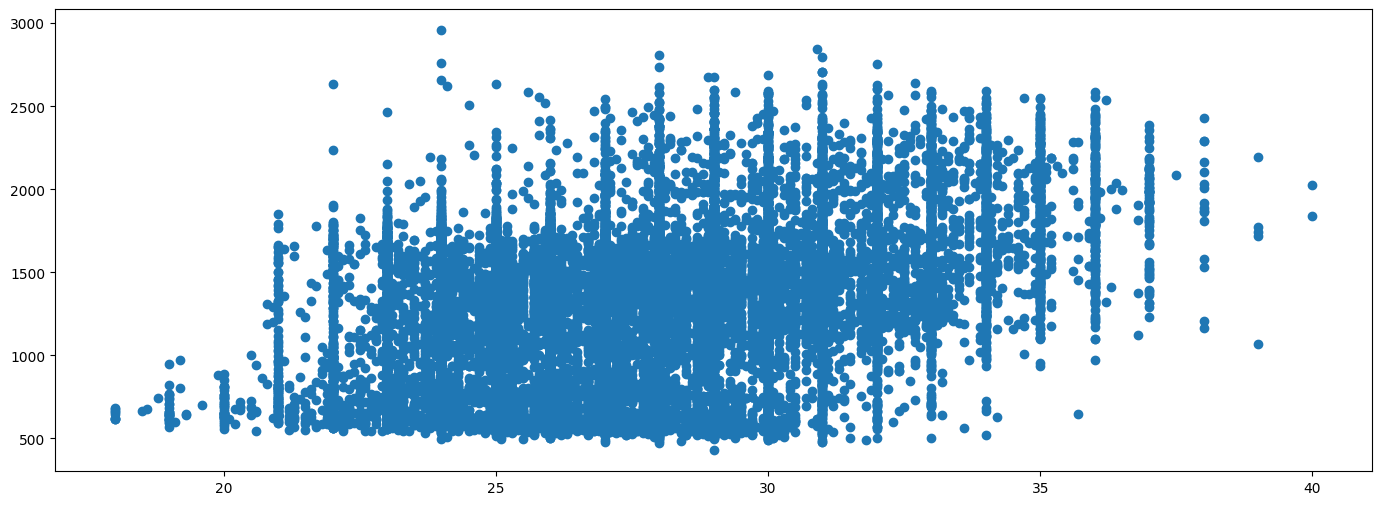

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(Ta_np,amp_plot_np);

In [ ]:
print(np.median(Ta_mp))

31.996000000000002


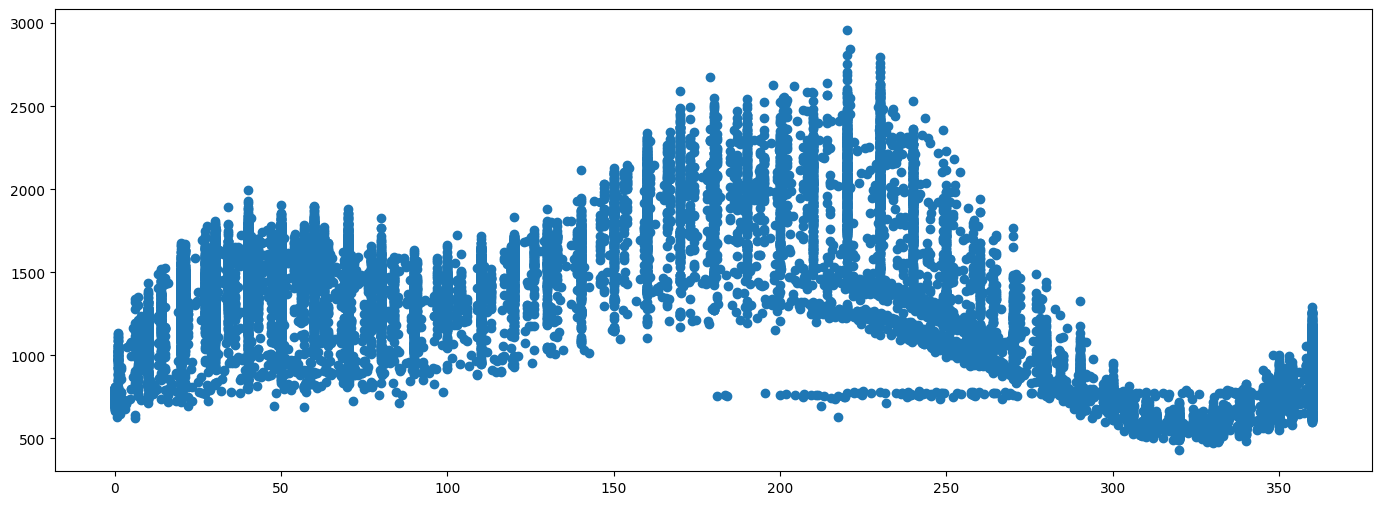

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(Wd_np,amp_plot_np);

In [ ]:
Ta_str = np.array(df.temp) #ambientTemp
Wv_str = np.array(df.Wind) #windVelocity
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs_str = np.array(df.GHI) #solarIrradiance

T = np.array(df.temp) #ambientTemp
V = np.array(df.Wind)
D=np.array(df.WinDir)
We_str = np.array([eff_wind(T[i], D[i], V[i]) for i in range(len(T))])

Wd_str=np.array(df.WindDirection)
time_str = np.array(df.LocalTime)
amp_plot_str =np.array([I_3E(Ta_str[i], qs_str[i], Wv_str[i], Wd_str[i]) for i in range(len(Ta_str))])

C:\Users\minhk\AppData\Local\Temp\ipykernel_11824\2244183191.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (((K_a(Wd)*(1.01+1.35*(Re(Ta,Wv)**0.52))/K_a(90)-1.01)/1.35)**(1/0.52))*u/(Do*p)


In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(Wv_str,amp_plot_str);

NameError: name 'Wv_str' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(We_str,amp_plot_str);

NameError: name 'We_str' is not defined

<Figure size 1700x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(Ta_str,amp_plot_str);

NameError: name 'Ta_str' is not defined

<Figure size 1700x600 with 0 Axes>

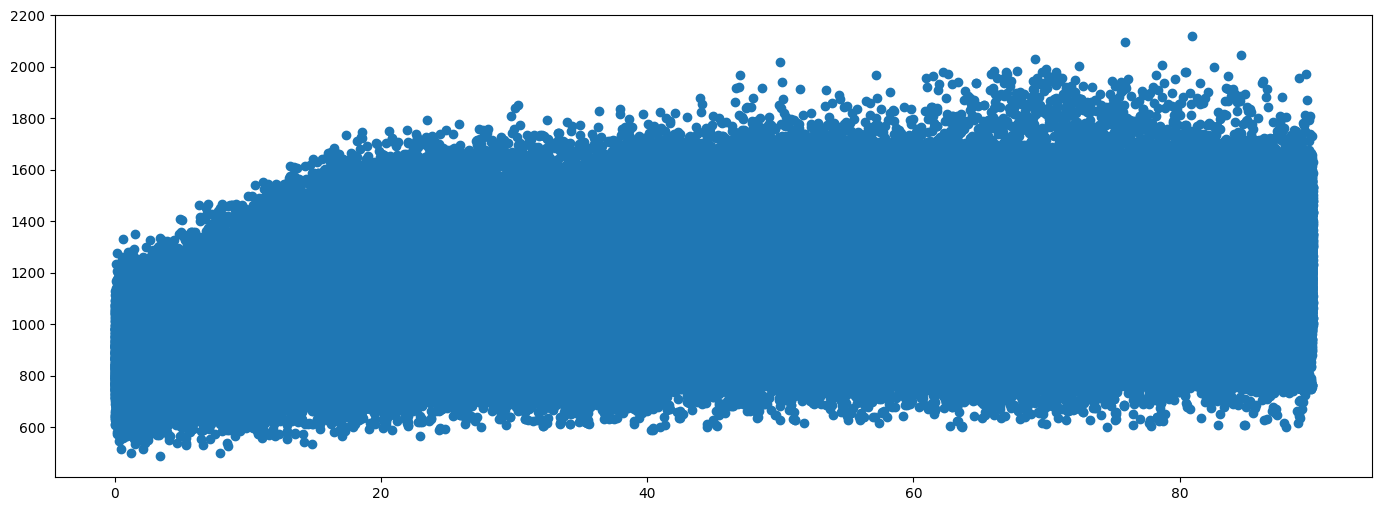

In [ ]:
plt.figure(figsize=(17,6))
plt.scatter(Wd_str,amp_plot_str);

In [ ]:
Wd_mp=np.array(df.WindDirection[(df['Month']==m)&(df['Day'].isin([21,22]))])
time_mp = np.array(df.LocalTime[(df['Month']==m)&(df['Day'].isin([21,22]))])

C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2006275184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(df.Wind[(df['Month']==1)]),color='navy',label='Jan',bins=50, hist=False)
C:\Users\Students\AppData\Local\Temp\ipykernel_19508\2006275184.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

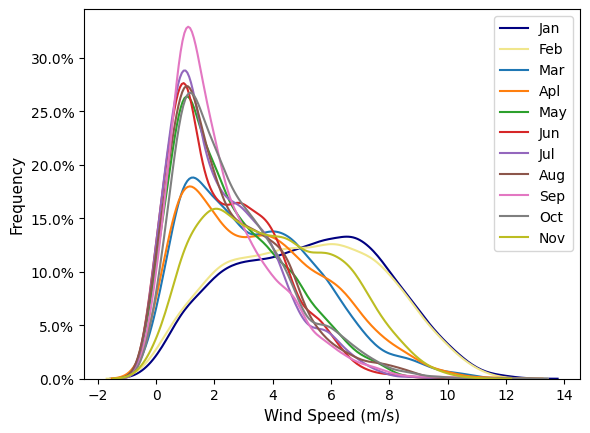

In [ ]:
sns.distplot(np.array(df.Wind[(df['Month']==1)]),color='navy',label='Jan',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==2)]),color='khaki',label='Feb',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==3)]),label='Mar',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==4)]),label='Apl',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==5)]),label='May',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==6)]),label='Jun',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==7)]),label='Jul',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==8)]),label='Aug',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==9)]),label='Sep',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==10)]),label='Oct',bins=50, hist=False)
sns.distplot(np.array(df.Wind[(df['Month']==11)]),label='Nov',bins=50, hist=False)

#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
#plt.axvline(x=940, color='red',linewidth=2,label='SLR: 940 A')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Wind Speed (m/s)',fontsize=11)
plt.ylabel('Frequency',fontsize=11)
plt.legend(loc='upper right',fontsize=10)
# plt.title('Distribution Plot of Temperature from 2020-2023',fontsize=11)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(amp_plot)))
plt.savefig(r"I:\VNL data\image\DLR\wind_profile.eps", format='eps', dpi = 1500)
plt.show()

In [ ]:
T = np.array(df.temp) #ambientTemp
V = np.array(df.Wind) #windVelocity #[(df.Month.isin([m]))&(df['Day']<32)]
#Wd_northbase = np.array(df.WindDir_Wvane1_deg_avg360) #windDirection
qs = np.array(df.GHI) #solarIrradiance
df['WindDirection']= df.WinDir.apply(wind)
D=np.array(df.Wind)

In [ ]:
def Wv_ewp(T,D,V):
    return minimize(Qc_eff(T,90,V)-Qc_eff(T,D,V),[90],method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

In [ ]:
print(Wv_ewp(25,80,V))

NameError: name 'Qc_eff' is not defined

In [ ]:
def Qc_eff(Ta,Wd,Wv):
    #Ta = 25 # ambient temp
    Ts = 100 # maximum allowable Temp
    Tf = (Ts+Ta)/2 # temp of boundary layer
    Do = 0.0309 # Conductor diameter
    He = 10 # elevation
    p = (1.293-1.525*10**(-4)*He + 6.379*10**(-9)*He**2)/(1+0.00367*Tf) # air density
    u = (1.458*(10**(-6))*((Tf+273)**1.5))/(Tf+383.4) # dynamic viscosity of air
    # Wv = # wind velocity
    
    #Wd = 90 # angle of wind direction and conductor axis
    kf = 2.424*10**(-2)+7.477*10**(-5)*Tf - 4.407*10**(-9)*Tf**2 # thermal conductivity of air
    K = 1.194-cosd(Wd)+0.194*cosd(2*Wd)+0.368*sind(2*Wd) #wind direction factor
    q1= K*(1.01+1.35*(Re(Ta,Wv)**0.52))*kf*(Ts-Ta) #1.35 w/m correct at low wind speeds
    q2= K*0.754*(Re(Ta,Wv)**0.6)*kf*(Ts-Ta)  #0.754 w/m correct at high wind speeds
    # Choose the larger of (q1,q2)
    q3 = 3.645*(p**0.5)*(Do**0.75)*((Ts-Ta)**1.25) # 3.645 at low Wv use the larger of forced and natural
    
    return max(q1,q2,q3)

In [ ]:
#Wd = np.array([(Wv_ewp(T[i],D[i],V),[90]) for i in range(len(D))])

In [ ]:
amp= amp_plot_CI-amp_plot

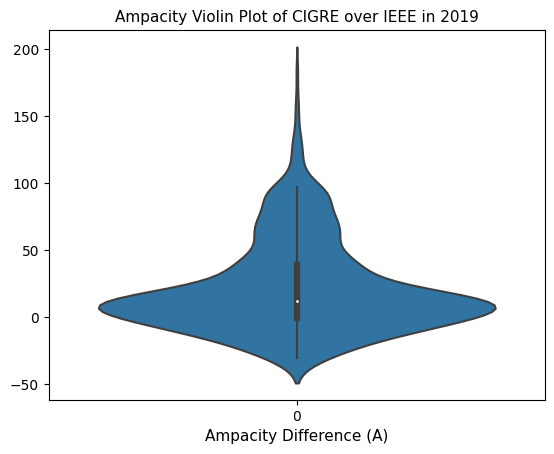

In [ ]:
sns.violinplot(amp[(amp<300)&(amp>-150)])#,hist_kws=dict(edgecolor="black",linewidth=0.5))
#fig, ax = plt.subplots()
#ax.hist(amp_plot,bins=50,edgecolor='black')
#plt.axvline(x=940, color='red',linewidth=2,label='SLR: 940 A')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Ampacity Difference (A)',fontsize=11)
#plt.ylabel('Frequency',fontsize=11)
#plt.legend()
plt.title('Ampacity Violin Plot of CIGRE over IEEE in 2019',fontsize=11)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=0.1))
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=0.1))
plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install ml_metrics

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in ml_metrics setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.



  Using cached ml_metrics-0.1.4.tar.gz (5.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
